In [1]:
import numpy as np
import matplotlib.pyplot as plt
from eomdp import utils as ut

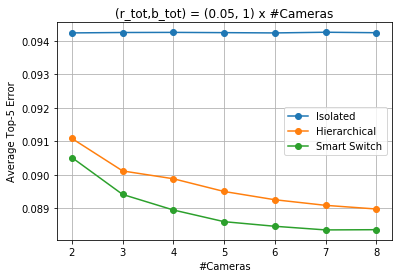

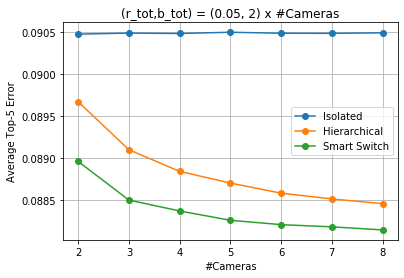

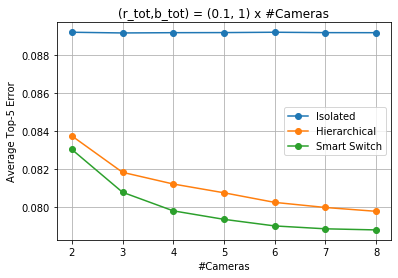

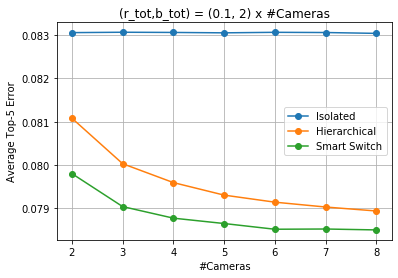

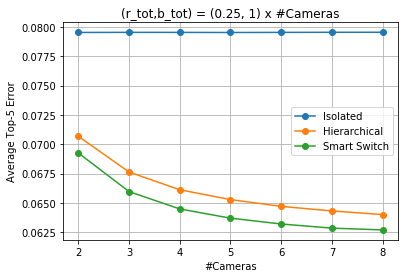

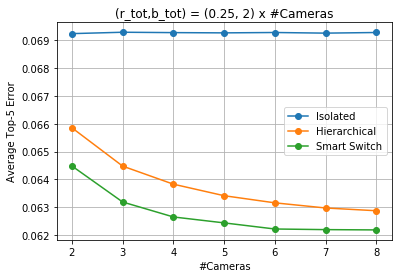

In [2]:
# Plot performance vs number of cameras

for rg in [0.05, 0.1, 0.25]:
    for bp in [1, 2]:
        losses = np.zeros((3, 7), np.float64)
        for i, nc in enumerate(range(2,9)):
            npz = np.load('save/mcam_rg%03d_bp%04d_nc%d_c%d.npz' % (int(rg*1000), int(bp*100), nc, 1))
            losses[0,i] = npz['iso']
            losses[1,i] = npz['hier']
            losses[2,i] = npz['smart']
        plt.Figure()
        plt.plot(np.arange(2,9), losses[0,:], '-oC0', label='Isolated')
        plt.plot(np.arange(2,9), losses[1,:], '-oC1', label='Hierarchical')
        plt.plot(np.arange(2,9), losses[2,:], '-oC2', label='Smart Switch')
        plt.xlabel('#Cameras'); plt.ylabel('Average Top-5 Error')
        plt.title(f'(r_tot,b_tot) = ({rg}, {bp}) x #Cameras')
        plt.grid(); plt.legend(); plt.show()

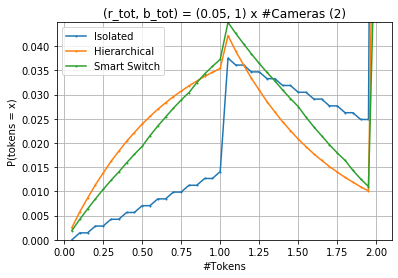

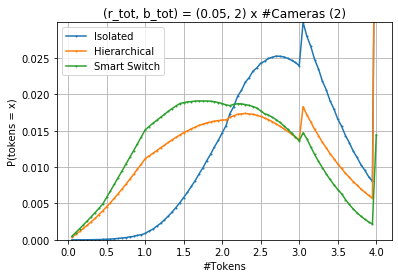

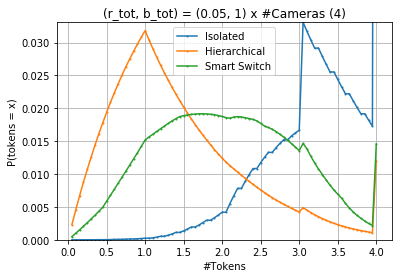

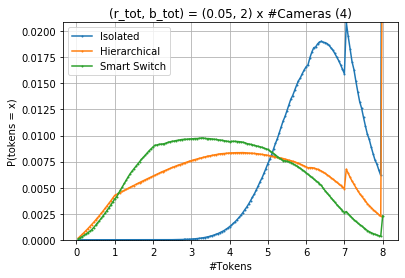

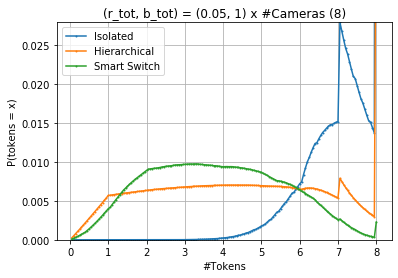

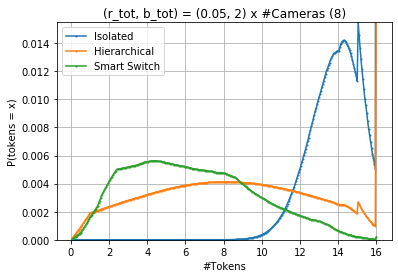

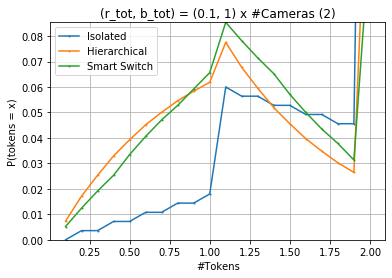

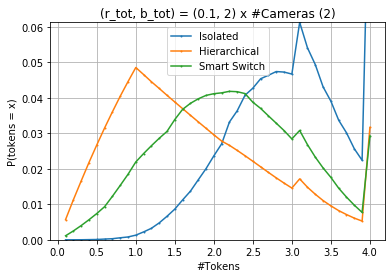

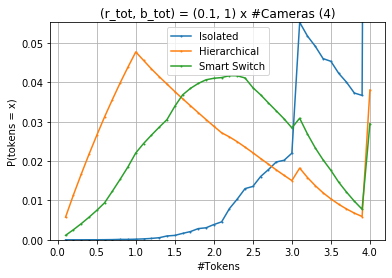

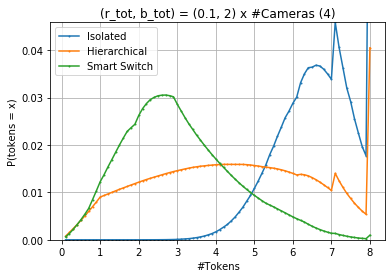

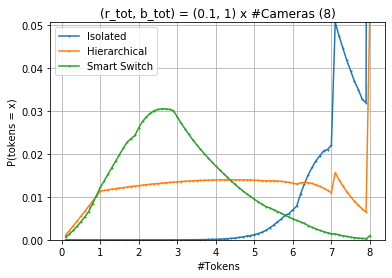

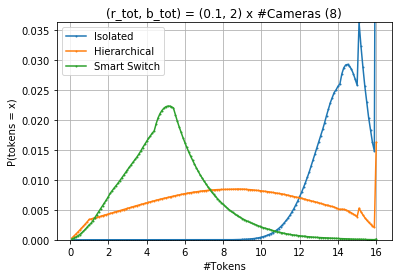

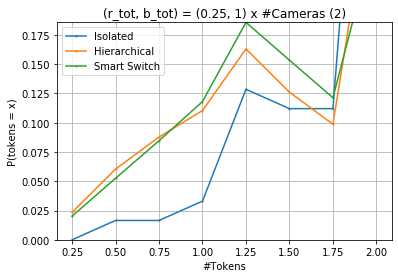

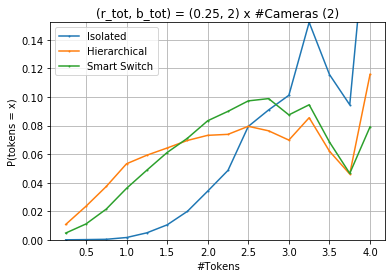

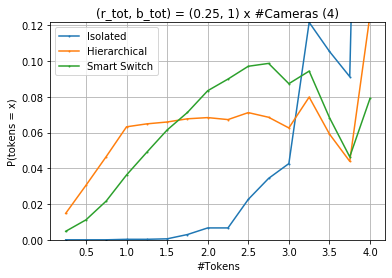

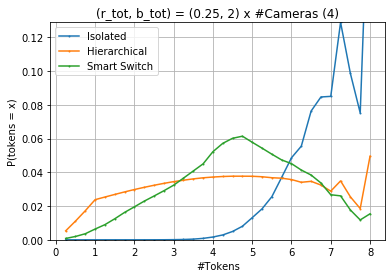

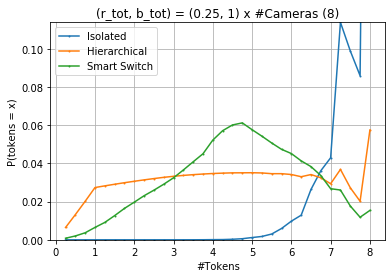

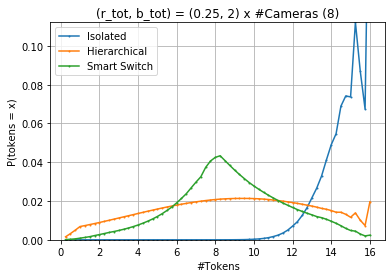

In [3]:
# Plot token utilization

for rg in [0.05, 0.1, 0.25]:
    for nc in [2, 4, 8]:
        for bp in [1, 2]:
            vidx, _ = ut.getvpidx(rg, bp*nc)
            npz = np.load('save/mcam_rg%03d_bp%04d_nc%d_c%d.npz' % (int(rg*1000), int(bp*100), nc, 1))
            iso_o = (npz['iso_o'])
            hier_o = (npz['hier_o'])
            smart_o = (npz['smart_o'])
            plt.Figure()
            plt.plot(vidx, iso_o, '-oC0', markersize=1, label='Isolated')
            plt.plot(vidx, hier_o, '-oC1', markersize=1, label='Hierarchical')
            plt.plot(vidx, smart_o, '-oC2', markersize=1, label='Smart Switch')
            plt.xlabel('#Tokens'); plt.ylabel('P(tokens = x)')
            plt.title(f'(r_tot, b_tot) = ({rg}, {bp}) x #Cameras ({nc})')
            ymax = np.amax([np.amax(iso_o[:-1]), np.amax(hier_o[:-1]), np.amax(smart_o[:-1])])
            plt.ylim([0, ymax])
            plt.grid(); plt.legend(); plt.show()

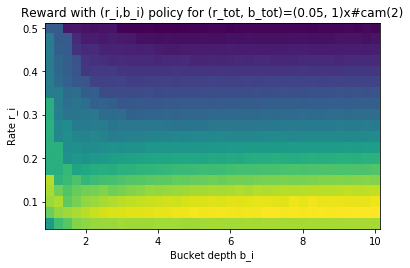

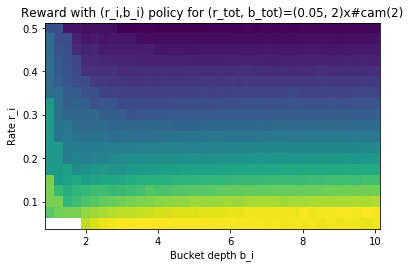

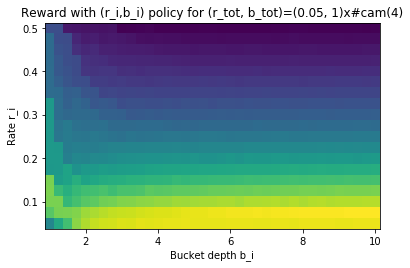

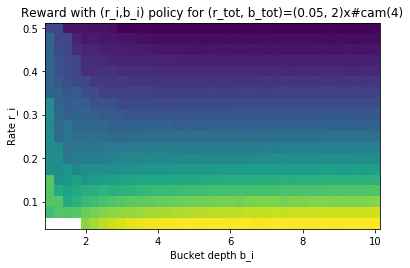

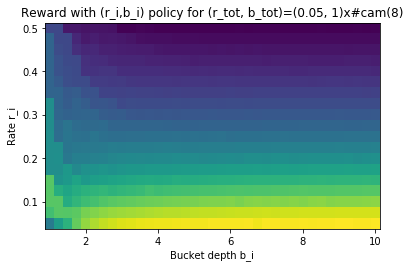

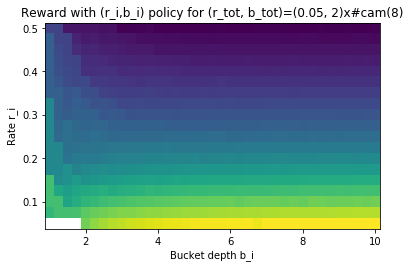

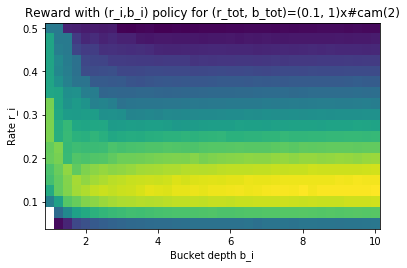

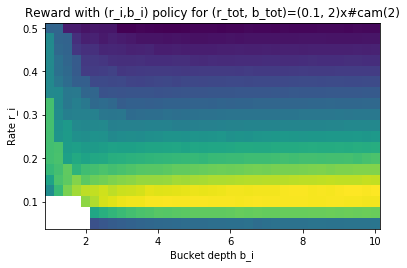

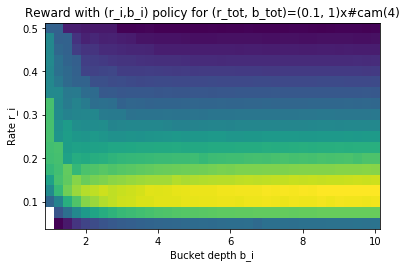

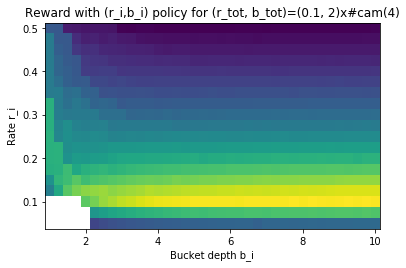

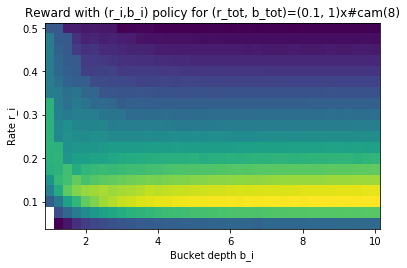

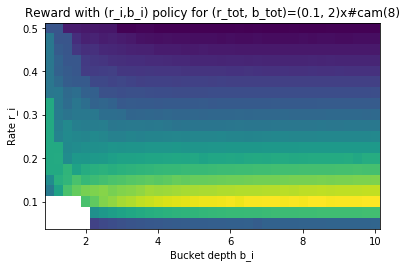

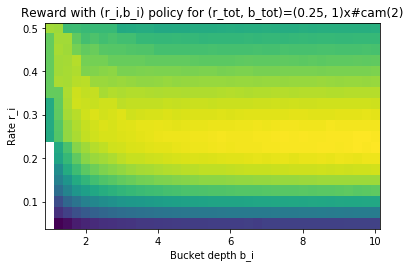

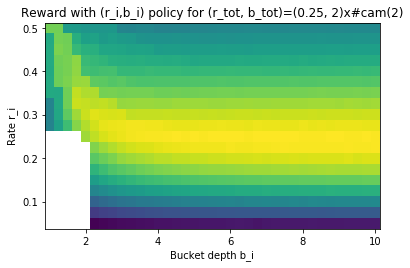

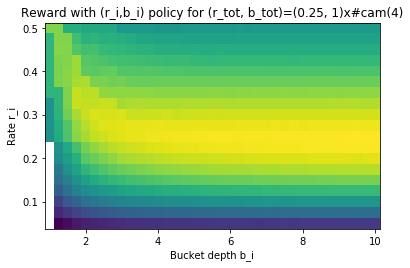

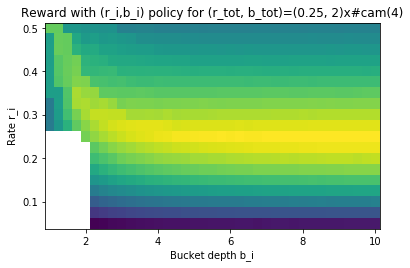

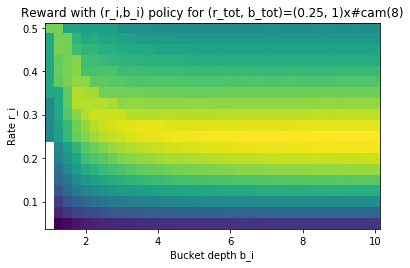

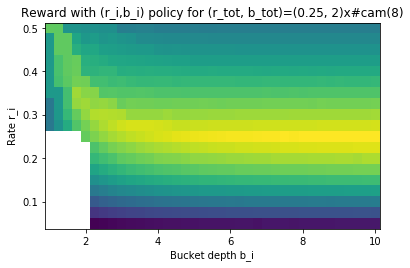

In [4]:
# Plot oversubscription performance

for rg in [0.05, 0.1, 0.25]:
    for nc in [2, 4, 8]:
        for bp in [1, 2]:
            vidx, _ = ut.getvpidx(rg, bp*nc)
            npz = np.load('save/mcam_rg%03d_bp%04d_nc%d_c%d.npz' % (int(rg*1000), int(bp*100), nc, 1))
            scores, ris, bis = npz['hscores'], npz['ris'], npz['bis']
            dr, db = ris[1]-ris[0], bis[1]-bis[0] 
            plt.Figure()
            _, ax = plt.subplots()
            ax.imshow(scores[::-1,:], 
                      extent=[bis[0]-db/2, bis[-1]+db/2, (ris[0]-dr/2), (ris[-1]+dr/2)],
                      interpolation='nearest')
            plt.xlabel('Bucket depth b_i'); plt.ylabel('Rate r_i')
            plt.title(f'Reward with (r_i,b_i) policy for (r_tot, b_tot)=({rg}, {bp})x#cam({nc})')
            ax.set_aspect(12)
            plt.show()
            